<a href="https://colab.research.google.com/github/kilimo-africa/X-AE-A-12/blob/master/ML_Task_Two_Feature_Extraction_%5BAssignment%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [0]:
data = pd.read_csv('02.1 train_data.csv', header=0)
#data.info()

To deal with missing values

In [0]:
replace_NA = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2',
              'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
              'Fence', 'Alley', 'MiscFeature', 'FireplaceQu','PoolQC'
             ]
for feature in replace_NA:
  data[feature].fillna('NA', inplace=True)

replace_mode = ['Electrical', 'MasVnrType']
for feature in replace_mode:
  mode_val = data[feature].mode() [0]
  data[feature].fillna(mode_val, inplace=True)

mean_val = data['MasVnrArea'].mean()
data['MasVnrArea'].fillna(mean_val, inplace=True)

for feature in ['LotFrontage', 'GarageYrBlt']:
  data[feature].fillna(0, inplace=True)

#data.isna().sum()

In [0]:
nominal = ['Street','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal = ['MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']
target = 'SalePrice'

for feature in ordinal:
  data[feature] = data[feature].astype('category').cat.codes

data_copy = pd.get_dummies(data[nominal])
data = pd.concat([data_copy, data], axis=1)
data.drop(nominal, axis=1, inplace=True)

In [0]:
X = data.loc[:, data.columns != target].values
Y = data.loc[:,target].values

# Standardize data to fit Gaussian/Normal Distribution
X = StandardScaler().fit_transform(X)

In [56]:
pca = PCA(n_components=2)
p_components = pca.fit_transform(X)
pca_data = pd.DataFrame(p_components, columns=['PC1', 'PC2'])
final_data = pd.concat([pca_data, data[target]], axis=1)
final_data

,PC1,PC2,SalePrice
0,3.215080,0.894168,208500
1,-0.519265,-2.827878,181500
2,3.566305,0.582123,223500
3,-1.991583,1.807516,140000
4,5.331819,1.061014,250000
5,-0.211385,-1.635709,143000
6,4.939998,-0.167895,307000
7,1.417021,-2.618635,200000
8,-5.068756,3.939212,129900
9,-5.113473,1.861238,118000


In [57]:
pca.explained_variance_ratio_
#takes a higher dimension dataset & reduces it

array([0.06491318, 0.03116748])

In [58]:
pca_90_var = PCA(.90)
p90_components = pca_90_var.fit_transform(X)
print("Caputuring 90% variance requires",p90_components.shape[1],"PCs")

Caputuring 90% variance requires 125 PCs


In [59]:
X_train = final_data.drop(target, 1)
Y_train = final_data[target]
regressor =  LassoCV()
regressor.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [60]:
W_1, W_2 = regressor.coef_
b = regressor.intercept_

final_data_array = final_data.to_numpy()
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X, Y = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))
Z = W_1*X + W_2*Y + b

print("The general linear regression equation: \n Y = X_1({}) * X_2({}) + {}".format(W_1,W_2,b))

The general linear regression equation: 
 Y = X_1(16816.066716200767) * X_2(3373.165271576576) + 180921.19589041095


Text(0.5, 0.92, 'Plane of Best Fit')

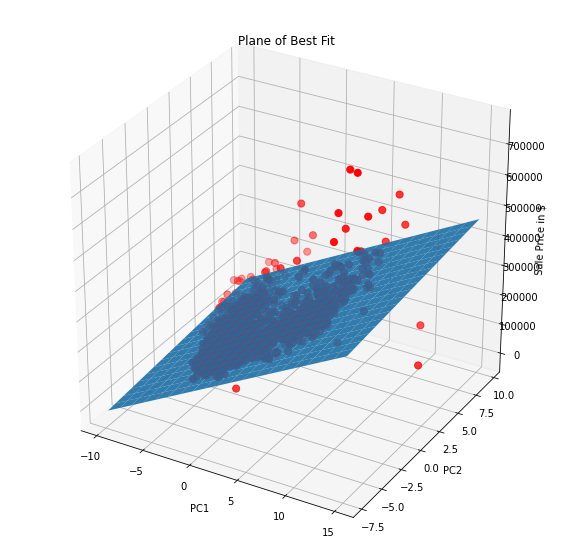

In [61]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('Sale Price in $')
ax.set_title('Plane of Best Fit')